In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


VISION GENERAL DE LOS DATAFRAME (LIMPIEZA Y PREPROCESADO DE DATOS)

In [3]:
cash=pd.read_csv(r'C:\Users\NURIA\Desktop\A_PYTHON\Introduccion y Analisi Exploratorio de Datos (EDA) Analisis de cohortes\extract_cash request_data analyst.csv')
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

In [4]:
cash.describe()

,id,amount,user_id,deleted_account_id
count,23970.000000,23970.000000,21867.000000,2104.000000
mean,13910.966124,82.720818,32581.250789,9658.755228
std,7788.117214,26.528065,27618.565773,7972.743249
min,3.000000,1.000000,34.000000,91.000000
25%,7427.250000,50.000000,10804.000000,3767.000000
50%,14270.500000,100.000000,23773.000000,6121.500000
75%,20607.750000,100.000000,46965.000000,16345.000000
max,27010.000000,200.000000,103719.000000,30445.000000


In [5]:
cash.isnull().sum() #HAY MUCHOS NULOS Y NO SE PUEDESN ELIMINAR

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [6]:
cash[cash.isna().any(axis=1)].sort_index(ascending=True)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [7]:
cash.nunique() #VALORES ÚNICOS POR COLUMNAS

id                            23970
amount                           41
status                            7
created_at                    23970
updated_at                    23970
user_id                       10798
moderated_at                  16035
deleted_account_id             1141
reimbursement_date             4089
cash_request_received_date      312
money_back_date               12221
transfer_type                     2
send_at                       16641
recovery_status                   4
reco_creation                  3330
reco_last_update               3330
dtype: int64

In [8]:
print(f' El número de duplicados es: {cash.duplicated().sum()}') #NO HAY DUPLICADOS

 El número de duplicados es: 0


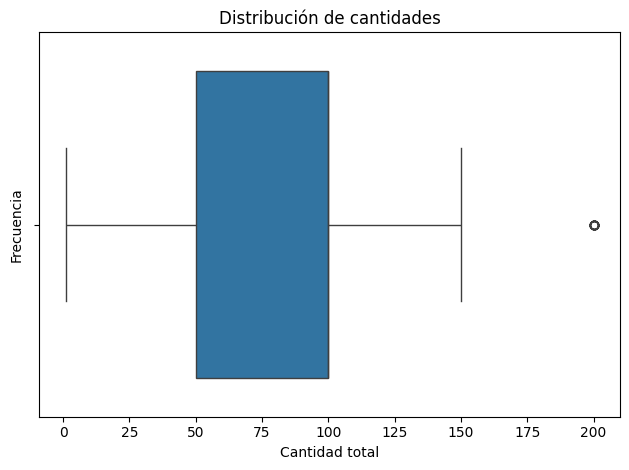

In [9]:
#VISUALIZACIÓN DE LAS VARIABLES CUANTITATIVAS PARA VER OUTLIERS
sns.boxplot(x=cash['amount'])
plt.title('Distribución de cantidades')
plt.xlabel('Cantidad total')      # <- Añade etiqueta al eje X
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [10]:
#OUTLIERS
q1, q3 = np.percentile(cash['amount'], [25, 75])
iqr=q3-q1
lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr
print(f"\nEn la variable cantidad de dinero pedido")
print(f"Q1:{q1}, Q3:{q3}, IQR: {iqr}")
print(f"Limite inferior: {lim_inferior}")
print(f"Limite superior: {lim_superior}")

outliers_iqr= cash['amount'][(cash['amount'] < lim_inferior) | (cash['amount'] > lim_superior)]
print(f'\nEl número de outliers es:{len(outliers_iqr)}')
print(f"\nOutliers using IQR method: \n{outliers_iqr}") 


En la variable cantidad de dinero pedido
Q1:50.0, Q3:100.0, IQR: 50.0
Limite inferior: -25.0
Limite superior: 175.0

El número de outliers es:25

Outliers using IQR method: 
467      200.0
557      200.0
727      200.0
763      200.0
980      200.0
1349     200.0
1510     200.0
2282     200.0
2332     200.0
3061     200.0
3221     200.0
3363     200.0
5530     200.0
6083     200.0
6874     200.0
6970     200.0
8333     200.0
8413     200.0
8474     200.0
10302    200.0
10418    200.0
11347    200.0
11469    200.0
13381    200.0
17144    200.0
Name: amount, dtype: float64


In [11]:
#ELIMINAMOS LOS OUTLIERS (25 DE >20000)
cash_so = cash[(cash['amount'] >= lim_inferior) & (cash['amount'] <= lim_superior)]
data=cash_so
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 23945 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23945 non-null  int64  
 1   amount                      23945 non-null  float64
 2   status                      23945 non-null  object 
 3   created_at                  23945 non-null  object 
 4   updated_at                  23945 non-null  object 
 5   user_id                     21844 non-null  float64
 6   moderated_at                16010 non-null  object 
 7   deleted_account_id          2102 non-null   float64
 8   reimbursement_date          23945 non-null  object 
 9   cash_request_received_date  16271 non-null  object 
 10  money_back_date             16525 non-null  object 
 11  transfer_type               23945 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             3329 non

In [12]:
#CARGAR FEES
fees = pd.read_csv(r'C:\Users\NURIA\Desktop\A_PYTHON\Introduccion y Analisi Exploratorio de Datos (EDA) Analisis de cohortes\extract_fees_data analyst.csv')
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


In [13]:
fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


In [14]:
fees.isnull().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [15]:
fees[fees.isna().any(axis=1)].sort_index(ascending=True) #demasiadas columnas no podemos eliminar

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


In [16]:
fees.nunique()

id                 21061
cash_request_id    12933
type                   3
status                 4
category               2
total_amount           2
reason             15149
created_at         21026
updated_at         21061
paid_at            15529
from_date           1084
to_date             1560
charge_moment          2
dtype: int64

In [17]:
fees.duplicated().sum() #no hay duplicados

np.int64(0)

In [18]:
fees.describe()

,id,cash_request_id,total_amount
count,21061.000000,21057.000000,21061.000000
mean,10645.355111,16318.449162,5.000237
std,6099.315256,6656.149949,0.034453
min,1.000000,1456.000000,5.000000
25%,5385.000000,11745.000000,5.000000
50%,10652.000000,17160.000000,5.000000
75%,15925.000000,21796.000000,5.000000
max,21193.000000,27010.000000,10.000000


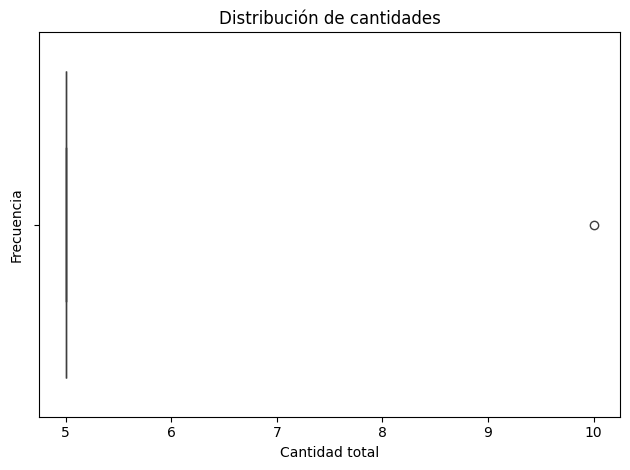

In [19]:
#VISUALIZACIÓN DE LAS VARIABLES CUANTITATIVAS PARA VER OUTLIERS
sns.boxplot(x=fees['total_amount'])
plt.title('Distribución de cantidades')
plt.xlabel('Cantidad total')      # <- Añade etiqueta al eje X
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

In [20]:
#OUTLIERS
q1, q3 = np.percentile(fees['total_amount'], [25, 75])
iqr=q3-q1
lim_inferior = q1 - 1.5 * iqr
lim_superior = q3 + 1.5 * iqr
print(f"\nEn la variable cantidad de dinero (incluyendo IVA)")
print(f"Q1:{q1}, Q3:{q3}, IQR: {iqr}")
print(f"Limite inferior: {lim_inferior}")
print(f"Limite superior: {lim_superior}")

outliers_iqr= fees['total_amount'][(fees['total_amount'] < lim_inferior) | (fees['total_amount'] > lim_superior)]
print(f'\nEl número de outliers es:{len(outliers_iqr)}')
print(f"\nOutliers using IQR method: \n{outliers_iqr}") 


En la variable cantidad de dinero (incluyendo IVA)
Q1:5.0, Q3:5.0, IQR: 0.0
Limite inferior: 5.0
Limite superior: 5.0

El número de outliers es:1

Outliers using IQR method: 
20604    10.0
Name: total_amount, dtype: float64


Sólo hay un outlier que ha pagado 10 (lo eliminamos)

In [21]:
fees_so = fees[(fees['total_amount'] >= lim_inferior) & (fees['total_amount'] <= lim_superior)]
fees_so.info() #21060 filas

<class 'pandas.core.frame.DataFrame'>
Index: 21060 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21060 non-null  int64  
 1   cash_request_id  21056 non-null  float64
 2   type             21060 non-null  object 
 3   status           21060 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21060 non-null  float64
 6   reason           21060 non-null  object 
 7   created_at       21060 non-null  object 
 8   updated_at       21060 non-null  object 
 9   paid_at          15530 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21060 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.2+ MB


METRICAS A ANALIZAR

1. Frecuencia de Uso del Servicio: Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

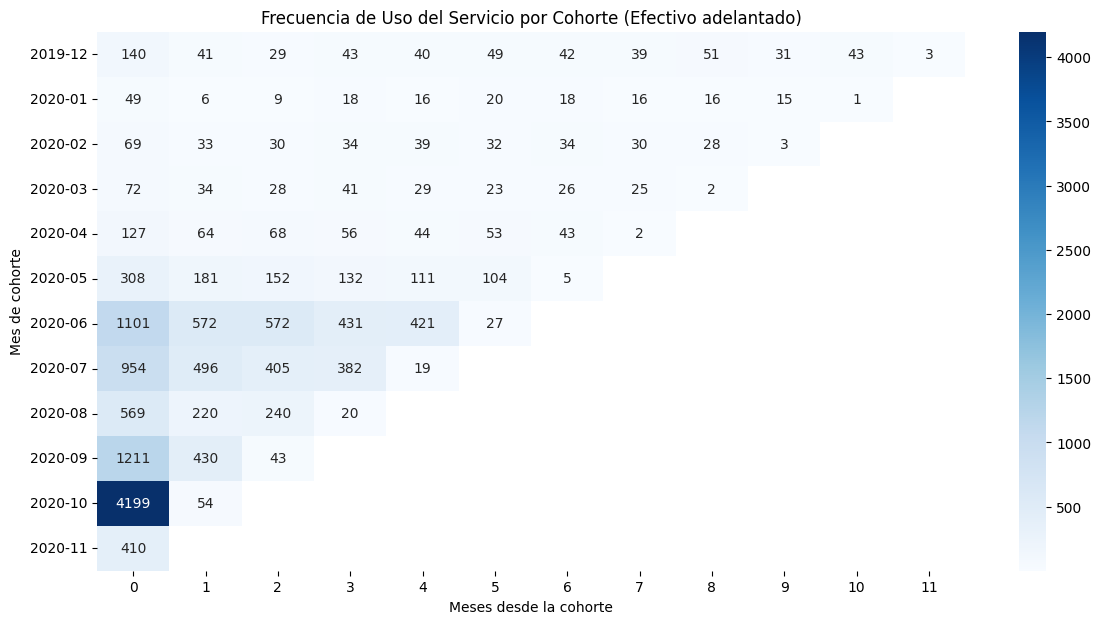

In [22]:
data['cash_request_received_date'] = pd.to_datetime(data['cash_request_received_date'])

data['cohort'] = data.groupby('user_id')['cash_request_received_date'].transform('min').dt.to_period('M') # Asignar cohorte: mes del primer adelanto de cada usuario
data['period'] = data['cash_request_received_date'].dt.to_period('M') # Periodo del adelanto actual (mes y año)

# Contar adelantos por cohorte y mes
cohort_counts = data.groupby(['cohort', 'period']).agg({'user_id': 'count'}).rename(columns={'user_id': 'usage_count'}).reset_index()
# Convertir períodos a timestamps para calcular diferencias
cohort_counts['cohort_start'] = cohort_counts['cohort'].dt.to_timestamp()
cohort_counts['period_start'] = cohort_counts['period'].dt.to_timestamp()

# Calcular meses desde la cohorte
cohort_counts['months_since_cohort'] = ((cohort_counts['period_start'] - cohort_counts['cohort_start']) / pd.Timedelta(days=30)).round().astype(int)
cohort_pivot = cohort_counts.pivot(index='cohort', columns='months_since_cohort', values='usage_count')

plt.figure(figsize=(14, 7)) # Visualización con heatmap
sns.heatmap(cohort_pivot, annot=True, fmt='.0f', cmap='Blues') 
plt.title('Frecuencia de Uso del Servicio por Cohorte (Efectivo adelantado)')
plt.xlabel('Meses desde la cohorte')
plt.ylabel('Mes de cohorte')
plt.show()




2. Frecuencia de Uso del Servicio: Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

In [ ]:
# Convertir created_at a datetime
fees_so['created_at'] = pd.to_datetime(fees_so['created_at'])

# Definir cohorte por mes de creación
fees_so['cohort'] = fees_so['created_at'].dt.to_period('M')

# Filtrar incidentes de pago
incident_types = ['rejected_direct_debit', 'month_delay_on_payment']

# Filtrar solo fees de tipo incident y categoría incidentes de pago
incidents = fees_so[(fees_so['type'] == 'incident') & (fees_so['category'].isin(incident_types))]

# Contar incidentes por cohorte
incident_counts = incidents.groupby('cohort').size().rename('incident_count')

# Contar total fees por cohorte (o total cash requests únicos si prefieres)
total_counts = fees_so.groupby('cohort')['cash_request_id'].nunique().rename('total_cash_requests')

# Combinar en un dataframe
cohort_stats = pd.concat([incident_counts, total_counts], axis=1).fillna(0)

# Calcular tasa de incidentes
cohort_stats['incident_rate'] = cohort_stats['incident_count'] / cohort_stats['total_cash_requests']

print(cohort_stats)

         incident_count  total_cash_requests  incident_rate
cohort                                                     
2020-06             7.0                  452       0.015487
2020-07           241.0                 1054       0.228653
2020-08           476.0                 2315       0.205616
2020-09           537.0                 3540       0.151695
2020-10           925.0                 8422       0.109831
2020-11            10.0                  240       0.041667
2020-05             0.0                   14       0.000000


3. Ingresos Generados por la Cohorte: Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.

In [24]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['cohort'] = data['created_at'].dt.to_period('M')

valid_status = ['approved', 'money_sent', 'active', 'money_back']
data_valid = data[data['status'].isin(valid_status)]

income_by_cohort = data_valid.groupby('cohort')['amount'].sum().reset_index()
income_by_cohort.rename(columns={'amount': 'total_income'}, inplace=True)

print(income_by_cohort)

     cohort  total_income
0   2019-12       14490.0
1   2020-01        9729.0
2   2020-02        9525.0
3   2020-03       15450.0
4   2020-04       29133.0
5   2020-05       54903.0
6   2020-06      148533.0
7   2020-07      175461.0
8   2020-08      171436.0
9   2020-09      222073.0
10  2020-10      497209.0
11  2020-11        9710.0
